In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [5]:
print (df.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [13]:
# The above data is not centered. PCA is affected by scale. 
# We need to center the data (mean = 0, Variance = 1)
# Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Get the features
x = df.loc[:, features].values
# Get the targets
y = df.loc[:,['target']].values
# Normalize the features
scalar = StandardScaler()
scalar.fit(x) # Finds mean and variance
x_centered = scalar.transform(x) # subtracts mean and variance
# you can use it to get mean and variance for training set using .fit on training set 
# Then you can use this value to normalize both training and test set using .transform on both sets
print(x_centered)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [15]:
# The original data has 4 columns. We project it to 2 dims using PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_centered)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

     principal component 1  principal component 2
0                -2.264542               0.505704
1                -2.086426              -0.655405
2                -2.367950              -0.318477
3                -2.304197              -0.575368
4                -2.388777               0.674767
5                -2.070537               1.518549
6                -2.445711               0.074563
7                -2.233842               0.247614
8                -2.341958              -1.095146
9                -2.188676              -0.448629
10               -2.163487               1.070596
11               -2.327378               0.158587
12               -2.224083              -0.709118
13               -2.639716              -0.938282
14               -2.192292               1.889979
15               -2.251465               2.722371
16               -2.202750               1.513750
17               -2.190179               0.514304
18               -1.894074               1.431111


In [10]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2          target
0                -2.264542               0.505704     Iris-setosa
1                -2.086426              -0.655405     Iris-setosa
2                -2.367950              -0.318477     Iris-setosa
3                -2.304197              -0.575368     Iris-setosa
4                -2.388777               0.674767     Iris-setosa
5                -2.070537               1.518549     Iris-setosa
6                -2.445711               0.074563     Iris-setosa
7                -2.233842               0.247614     Iris-setosa
8                -2.341958              -1.095146     Iris-setosa
9                -2.188676              -0.448629     Iris-setosa
10               -2.163487               1.070596     Iris-setosa
11               -2.327378               0.158587     Iris-setosa
12               -2.224083              -0.709118     Iris-setosa
13               -2.639716              -0.938282     Iris-setosa
14        

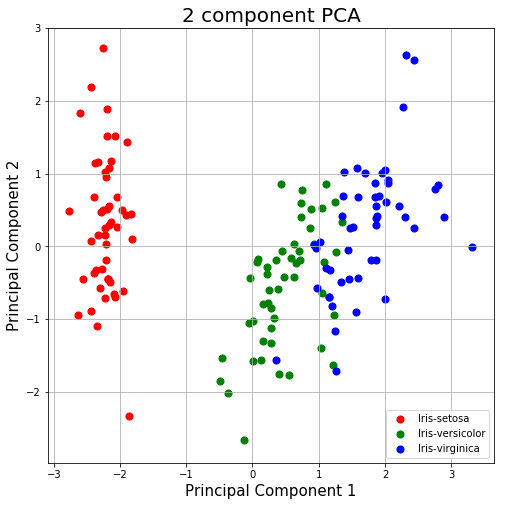

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=10, random_state=50)
svd.fit(x)
latent_data = svd.transform(x)
print(latent_data[0:5,:])
print ("\n")
principalDf = pd.DataFrame(data = latent_data
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

[[5.91220352 2.30344211]
 [5.57207573 1.97383104]
 [5.4464847  2.09653267]
 [5.43601924 1.87168085]
 [5.87506555 2.32934799]]


     principal component 1  principal component 2          target
0                 5.912204               2.303442     Iris-setosa
1                 5.572076               1.973831     Iris-setosa
2                 5.446485               2.096533     Iris-setosa
3                 5.436019               1.871681     Iris-setosa
4                 5.875066               2.329348     Iris-setosa
5                 6.476990               2.325526     Iris-setosa
6                 5.515429               2.071562     Iris-setosa
7                 5.850423               2.149480     Iris-setosa
8                 5.158513               1.776427     Iris-setosa
9                 5.644582               1.991906     Iris-setosa
10                6.264827               2.427279     Iris-setosa
11                5.751504               2.021424     Iris-setosa
12            

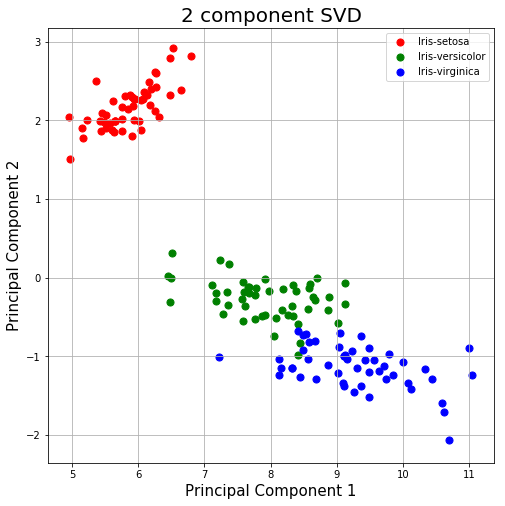

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component SVD', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()